In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn

from torchvision.datasets import GTSRB
import torchvision.transforms as T
from torch.utils.data import DataLoader

transform = T.Compose([
    T.Resize(64),
    T.CenterCrop(64),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def collate_fn(data):
    images, labels = zip(*data)
    images = torch.stack(images, dim=0).float()
    labels = torch.tensor(labels).int()
    return {'images': images, 'labels': labels}

train_data = GTSRB(root='data', split='test', download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True, drop_last=True, num_workers=4, collate_fn=collate_fn)
test_loader = DataLoader(
    torch.utils.data.Subset(train_data, list(range(1000))), 
    batch_size=8, shuffle=False, drop_last=False, num_workers=4, collate_fn=collate_fn
)

In [6]:
len(test_loader.dataset)

1000

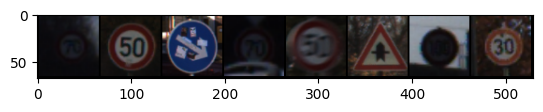

In [3]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import torchvision

batch = next(iter(train_loader))

grid = vutils.make_grid(batch['images'], nrow=8, padding=2, normalize=True)
plt.imshow(torchvision.transforms.functional.to_pil_image(grid))

In [4]:
from src.model.dcgan.discriminator import Discriminator
from src.model.dcgan.generator import Generator

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_g = Generator(latent_dim=100)
model_d = Discriminator()
model_g = model_g.to(DEVICE)
model_d = model_d.to(DEVICE)

criterion = nn.BCELoss()
optimizer_d = torch.optim.Adam(model_d.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_g = torch.optim.Adam(model_g.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [5]:
from src.utils.trainer import Trainer
import os

os.environ['WANDB_API_KEY'] = 'YOUR_KEY'

t = Trainer(
    run_name='demo_run',
    model_discriminator=model_d,
    model_generator=model_g,
    optimizer_generator=optimizer_g,
    optimizer_discriminator=optimizer_d,
    criterion=criterion,
    train_loader=train_loader,
    test_loader=test_loader,
    device=DEVICE
)
t.train(n_epoch=10)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dzhunkoffski. Use `wandb login --relogin` to force relogin


Epoch: 1:  59%|█████▉    | 928/1578 [02:12<01:32,  7.02it/s]


KeyboardInterrupt: 